# Pandas Tutorial(3)

https://github.com/adeshpande3/Pandas-Tutorial/blob/master/Pandas%20Tutorial.ipynb 의 자료를 기반으로 작성함.

In [56]:
import pandas as pd

In [113]:
import numpy as np

**Example CSV file** : Crime Records( The Sacramento crime January 2006 file contains 7,584 crime records, as made available by the Sacramento Police Department. Law enforcement agencies should enjoy working with this dataset.)



출처 : https://support.spatialkey.com/spatialkey-sample-csv-data/

In [4]:
df = pd.read_csv('SacramentocrimeJanuary2006.csv')

In [5]:
df.head() 

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,1/1/06 0:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,1/1/06 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,1/1/06 0:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,1/1/06 0:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,1/1/06 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613


In [6]:
df.columns.tolist()

['cdatetime',
 'address',
 'district',
 'beat',
 'grid',
 'crimedescr',
 'ucr_ncic_code',
 'latitude',
 'longitude']

## 정렬(Sorting)

낮은 district에 따라 오름차순으로 정렬하고 싶다면 `sort_values()` 함수를 사용한다.

In [8]:
df.sort_values('district').tail()

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
3108,1/13/06 18:00,3264 RAMONA AVE,6,6C,1113,10851(A)VC TAKE VEH W/O OWNER,2404,38.545224,-121.415719
3105,1/13/06 18:00,15 CARTHAGE CT,6,6C,1443,MISSING PERSON,7000,38.505769,-121.418114
6430,1/27/06 9:45,8151 POWER RIDGE RD,6,6C,1145,10851 VC AUTO THEFT LOCATE,2404,38.531579,-121.407542
1553,1/7/06 16:10,3946 2ND AVE,6,6A,1014,459 PC BURGLARY RESIDENCE,2204,38.550676,-121.461860
3791,1/16/06 22:00,5961 13TH AVE,6,6B,1056,459 PC BURGLARY VEHICLE,2299,38.540424,-121.436177


## 조건에 따라 행 추출

district 수가 3보다 큰 행만 추출하기 위한 두 단계
    1. 먼저 df['district'] >3 은 각 행에 대해 district가 3보다 큰 지의 여부를 True/False Series로 반환한다.  
    2. 이 Series 를 이용하여 df를 다음과 같이 인덱싱하면 시리즈에서 True인 행만 추출 할 수 있다  
    : **df[df['Wscore'] > 3].**

In [15]:
print(type(df['district']> 3)) # True/False 시리즈로 반환되는지 확인
(df['district'] > 3).head()# 시리즈의 앞부분을 확인

<class 'pandas.core.series.Series'>


0    False
1     True
2    False
3     True
4    False
Name: district, dtype: bool

In [10]:
df[df['district'] > 3].head() # Boolean Series를 이용해 조건이 True인 행들만 추출

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
1,1/1/06 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
3,1/1/06 0:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
5,1/1/06 0:00,5301 BONNIEMAE WAY,6,6B,1084,530.5 PC USE PERSONAL ID INFO,2604,38.526979,-121.451338
6,1/1/06 0:00,2217 16TH AVE,4,4A,957,459 PC BURGLARY VEHICLE,2299,38.537173,-121.487577
10,1/1/06 0:00,2315 STOCKTON BLVD,6,6B,1005,ASSAULT WITH WEAPON - I RPT,7000,38.554264,-121.454605


아래와 같이 두 가지 이상의 조건을 부여할 수 있다.

In [42]:
df[(df['district'] > 3) & (df['beat'].astype(str).str[:2] == '6B')]

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
5,1/1/06 0:00,5301 BONNIEMAE WAY,6,6B,1084,530.5 PC USE PERSONAL ID INFO,2604,38.526979,-121.451338
10,1/1/06 0:00,2315 STOCKTON BLVD,6,6B,1005,ASSAULT WITH WEAPON - I RPT,7000,38.554264,-121.454605
11,1/1/06 0:00,5112 63RD ST,6,6B,1088,530.5 PC USE PERSONAL ID INFO,2604,38.528165,-121.431453
15,1/1/06 0:00,4856 11TH AVE,6,6B,1054,487(A) PC GRAND THEFT,2303,38.541529,-121.449510
25,1/1/06 0:01,3340 62ND ST,6,6B,1047,594(B)(1)PC VANDALISM +$400,2999,38.543804,-121.433283
...,...,...,...,...,...,...,...,...,...
7530,1/31/06 19:42,ORTEGA ST / JANSEN DR,6,6B,1402,TOWED/STORED VEH-14602.6,7000,38.522068,-121.431868
7541,1/31/06 20:30,5100 STOCKTON BLVD,6,6B,1084,243(E)1 BATTERY NONCOHAB SPOUS,1315,38.528234,-121.445648
7554,1/31/06 21:42,6125 STOCKTON BLVD,6,6B,1421,368(C) CAUSE PAIN/INJ TO ELDER,1315,38.515466,-121.436251
7575,1/31/06 23:00,1857 DISCOVERY WAY,6,6B,1006,484 PC PETTY THEFT/ OUTSIDE,2309,38.556651,-121.447708


## 그룹화(Grouping)

`groupby`는 특성 속성 별로 그룹화 함수를 적용할 수 있도록 한다.

In [93]:
df.groupby('address')['district'].mean().head()

address
1 CLAUSS CT        6.0
1 DECATHLON CIR    5.0
1 DEERTREE CT      5.0
1 GOFF CT          2.0
1 GRANVILLE CT     2.0
Name: district, dtype: float64

`value` 속성은 데이터프레임 값을 Numpy 형태로 변환한다.

In [50]:
print(type(df.values))
print(df.values.shape)
df.values

<class 'numpy.ndarray'>
(7584, 9)


array([['1/1/06 0:00', '3108 OCCIDENTAL DR', 3, ..., 2404, 38.55042047,
        -121.3914158],
       ['1/1/06 0:00', '2082 EXPEDITION WAY', 5, ..., 2204, 38.47350069,
        -121.4901858],
       ['1/1/06 0:00', '4 PALEN CT', 2, ..., 2404, 38.65784584,
        -121.4621009],
       ...,
       ['1/31/06 23:41', '30TH ST / K ST', 3, ..., 5400, 38.57203045,
        -121.4670118],
       ['1/31/06 23:45', '5303 FRANKLIN BLVD', 4, ..., 7000, 38.52718667,
        -121.4712477],
       ['1/31/06 23:50', 'COBBLE COVE LN / COBBLE SHORES DR', 4, ...,
        5400, 38.47962803, -121.5286345]], dtype=object)

따라서 `values` 속성은 Numpy ndarray와 동일한 방법으로 사용할 수 있다.

In [51]:
df.values[0, 0]

'1/1/06 0:00'

## 데이터프레임 순환

`iterrows()` 함수를 사용하면 데이터프레임의 행 단위로 순환이 가능하다. 각 행은 시리즈 형태로 반환된다.

In [55]:
for index, row in df.iterrows():
    print('#Data type of row:', type(row))
    print(row)
    if index == 3:
        break

#Data type of row: <class 'pandas.core.series.Series'>
cdatetime                          1/1/06 0:00
address                     3108 OCCIDENTAL DR
district                                     3
beat                                3C        
grid                                      1115
crimedescr       10851(A)VC TAKE VEH W/O OWNER
ucr_ncic_code                             2404
latitude                              38.55042
longitude                          -121.391416
Name: 0, dtype: object
#Data type of row: <class 'pandas.core.series.Series'>
cdatetime                       1/1/06 0:00
address                 2082 EXPEDITION WAY
district                                  5
beat                             5A        
grid                                   1512
crimedescr       459 PC  BURGLARY RESIDENCE
ucr_ncic_code                          2204
latitude                          38.473501
longitude                       -121.490186
Name: 1, dtype: object
#Data type of row: <class

## 데이터 시각화

matplotlib을 이용해 아래와 같이 데이터프레임으로부터 바로 그래프를 그리는 것이 가능.

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

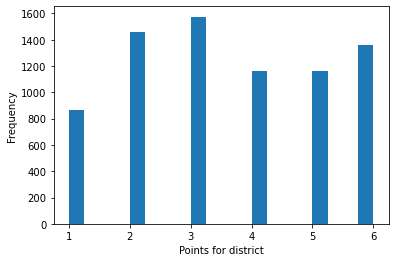

In [61]:
a = df['district'].plot.hist(bins=20)
a.set_xlabel('Points for district')
plt.show()

## 데이터클리닝

대표적인 데이터 클리닝은 결측값(missing value) 처리인데, pandas 는 결측값 여부를 반환하는 `isnull`함수가 있다. 아래와 같이 `sum()` 함수와 결합하면 각 열의 결측값 수를 알 수 있다.

In [62]:
df.isnull().sum()

cdatetime        0
address          0
district         0
beat             0
grid             0
crimedescr       0
ucr_ncic_code    0
latitude         0
longitude        0
dtype: int64

In [75]:
df1 = pd.read_csv('sample.csv')
df1

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,NaN,NaN,10
3,Kang,1004,90.0,49.0,10


In [76]:
df1.isnull().sum()

name     0
sn       0
mid      1
final    1
quiz     0
dtype: int64

결측치를 처리하는 일반적인 방법으로 다음과 같은 함수가 있다.

`dropna()` : 결측치가 있는 모든 행을 없앤다.  
`fillna()` : 결측치를 정해진 값으로 바꾼다.

아래 예에서는 결측치를 0으로 바꾼다.

In [77]:
df1.fillna(0)

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10


In [79]:
df1.dropna()

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
3,Kang,1004,90.0,49.0,10


## CSV 파일로 데이터프레임 저장 

`to_csv()` 함수 사용 시 데이터프레임을 csv로 쉽게 저장할 수 있다.

In [80]:
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv')
df2

,Unnamed: 0,name,sn,mid,final,quiz
0,0,Park,1001,70.0,60.0,10
1,1,Kim,1002,80.0,75.0,10
2,2,Lee,1003,0.0,0.0,10
3,3,Kang,1004,90.0,49.0,10


첫 열에 Unnamed가 있는 이유는, 저장 시 index가 함께 저장되고 읽어들일 때 새로운 인덱스로 할당했기 때문이다. 이것을 해결 하기 위해선 첫째, 저장할 때 인덱스를 제외하고 저장하거나 둘째, 읽어들일 때 첫 열을 인덱스로 읽어들이는 방법이 있다.

In [81]:
#첫째 방법 
df1.fillna(0).to_csv('test.csv', index=False) #인덱스를 저장하지 않음
df2 = pd.read_csv('test.csv')
df2

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10


In [87]:
#둘째 방법
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv', index_col=0) #첫 열을 인덱스로 저장
df2

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10


## 기타 유용한 함수들

- `drop()` - This function removes the column or row that you pass in (You also have the specify the axis).
- `agg()` - The aggregate function lets you compute summary statistics about each group
- `apply()` - Lets you apply a specific function to any/all elements in a Dataframe or Series
- `get_dummies()` - Helpful for turning categorical data into one hot vectors.
- `drop_duplicates()` - Lets you remove identical rows

In [104]:
# agg() 각 그룹에 대한 요약 통계
print(df.groupby('cdatetime').agg(sum))

             district   grid  ucr_ncic_code    latitude    longitude
cdatetime                                                           
1/1/06 0:00        84  19783          62169  771.062227 -2429.025781
1/1/06 0:01        76  20558          89955  925.531364 -2915.523340
1/1/06 0:10         6   1421           5213   38.515264  -121.429651
1/1/06 0:15         2    212           2404   38.657373  -121.457758
1/1/06 0:18         6   1087           7000   38.527992  -121.434789
...               ...    ...            ...         ...          ...
1/9/06 9:34         3    841           7000   38.572711  -121.466290
1/9/06 9:35         6   1007           7000   38.546756  -121.453840
1/9/06 9:40         5   1603           1315   38.474355  -121.448452
1/9/06 9:55         6   1019           7000   38.546695  -121.441693
1/9/06 9:58         1    444           5007   38.608748  -121.494402

[5094 rows x 5 columns]


## 기타 참고 사이트

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
- https://www.dataquest.io/blog/pandas-python-tutorial/
- https://drive.google.com/file/d/0ByIrJAE4KMTtTUtiVExiUGVkRkE/view
- https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y